# User Engagement Challenge



Define an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period. Identify which factors predict future user adoption. Wirte up the findings along with summary tables, graphs and code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1', parse_dates=['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [5]:
engage = pd.read_csv('takehome_user_engagement.csv', encoding='latin-1', parse_dates=['time_stamp'])

In [6]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [7]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
# Create a column of the year and the week of the year
engage['week'] = engage['time_stamp'].dt.strftime('%Y-%U')

In [9]:
weeks = engage.groupby(['user_id', 'week']).size().reset_index().rename(columns={0:'count'})
weeks.head()

,user_id,week,count
0,1,2014-16,1
1,2,2013-45,1
2,2,2013-47,1
3,2,2013-49,1
4,2,2013-51,1


In [10]:
# Adopted user is one who has logged into the product on 3 separate days in at least one 7-day period. 
adopted = weeks.loc[weeks['count'] >= 3].user_id.unique()
print('Number of Adopted Users: {}'.format(len(adopted)))
print('Percentage of Adopted Users: {:.2f}%'.format(len(adopted)/users.shape[0]*100))

Number of Adopted Users: 1432
Percentage of Adopted Users: 11.93%


In [11]:
users['adopted'] = (users['object_id'].isin(adopted))
users.shape

(12000, 11)

In [12]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,False


### Factors of User Adoption
1. How were the accounts created? Users who were invited to an oranization as a guest or signed up using Google Authentication have the highest adoption rate (about 15%), while users who were invited to join another user's personal workspace have the lowest adoption rate (less than 7%). 
2. What kind of the email address did users use to sign up the account? Users who signed up using hotmail.com (over 15%) or gmail.com (about 13%) have the highest adoption rates. Users with yahoo.com or cuvox.de have the lowest adoption rates (less than 10%).   
3. Does organization size matter? Users who belong to larger organizations tend to have lower adoption rates than users in smaller organizations.  
4. When was the user's last session? Users whose last sessions were in May have an adoption rate of 40%, and those whose last sessions were in June of 2014 have an adoptoin rate of 90%. Users whose last sessions were before May 2014 have less than 8% of adoption rate. This is reasonable since adopted users are much more likely to continue to use the service up to recent months. Users who stopped using the service more than two months prior are less likely to have been identified as adopted users. 
5. When was the account created? Users whose accounts were created in April or May of 2014 are less likely to be adopted users. This is probably because there is not enough data from these new users to determine whether they would be adopted users or not. 

In [13]:
# How their accounts were created? Invited to join personal project, to join organization as a full
# member or as a guest? Sign up via website or google authentication?
users.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

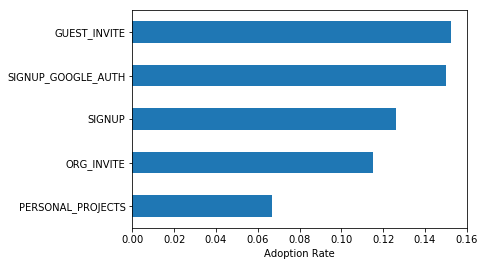

In [14]:
users.groupby('creation_source')['adopted'].mean().sort_values(0).plot(kind='barh')
plt.xlabel('Adoption Rate')
plt.ylabel('')
plt.show()

Most email addresses come from these 7 websites: gmail.com, yahoo.com, jourrapide.come, cuvox.de, gustr.com, and hotmail.com. The rest come from random websites, so I group them into one category named "random website."

In [15]:
users['domain'] = users['email'].map(lambda x: x.split('@')[1])
random = (users.domain != 'gmail.com') & (users.domain != 'yahoo.com') & (users.domain != 'hotmail.com') & (users.domain != 'jourrapide.com') & (users.domain != 'gustr.com') & (users.domain != 'cuvox.de')
users.loc[random, 'domain'] = 'random website'
users['domain'].value_counts()

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
random website    1186
gustr.com         1179
hotmail.com       1165
Name: domain, dtype: int64

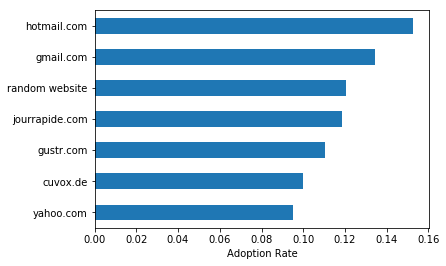

In [16]:
users.groupby(['domain'])['adopted'].mean().sort_values(0).plot(kind='barh')
plt.xlabel('Adoption Rate')
plt.ylabel('')
plt.show()

In [17]:
org_size = users.org_id.value_counts()
users['org_size'] = users.org_id.map(org_size)

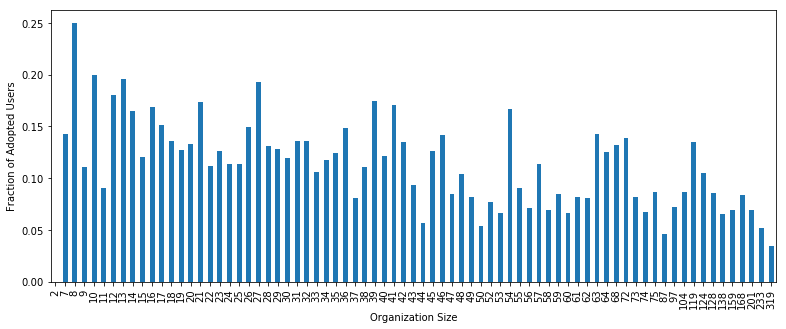

In [18]:
users.groupby('org_size')['adopted'].mean().plot(kind='bar', figsize=(13,5))
plt.xlabel('Organization Size')
plt.ylabel('Fraction of Adopted Users')
plt.show()

In [19]:
# Missing last session creation time means they are not adopting the product. 
users['missing'] = users.last_session_creation_time.isnull()
users.groupby('missing')['adopted'].mean()

missing
False    0.162303
True     0.000000
Name: adopted, dtype: float64

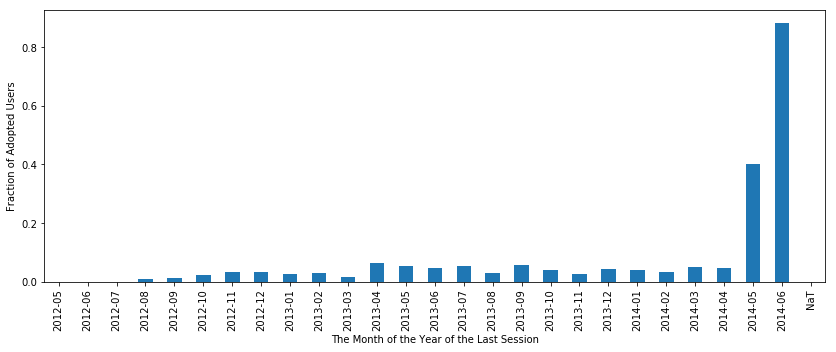

In [20]:
users['last_date'] = pd.to_datetime(users['last_session_creation_time'].dt.date)
users['last_month'] = users['last_date'].dt.strftime('%Y-%m')
users.groupby('last_month')['adopted'].mean().plot(kind='bar', figsize=(14,5))
plt.xlabel('The Month of the Year of the Last Session')
plt.ylabel('Fraction of Adopted Users')
plt.show()

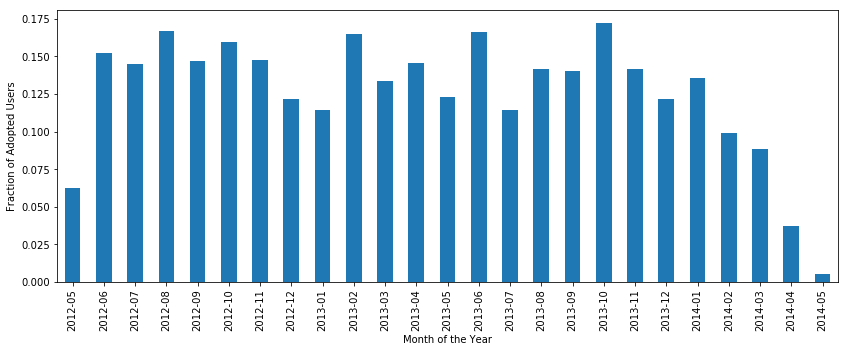

In [21]:
users['date'] = pd.to_datetime(users['creation_time'].dt.date)
users['month'] = users['date'].dt.strftime('%Y-%m')
users.groupby('month')['adopted'].mean().plot(kind='bar', figsize=(14,5))
plt.xlabel('Month of the Year')
plt.ylabel('Fraction of Adopted Users')
plt.show()

In [22]:
# Those who were invited by individual users are more likely to adopt the product.
users['invited'] = users.invited_by_user_id.notnull()
users.groupby('invited')['adopted'].mean()

invited
False    0.109618
True     0.127786
Name: adopted, dtype: float64

In [23]:
users.groupby(['opted_in_to_mailing_list'])['adopted'].mean()

opted_in_to_mailing_list
0    0.118588
1    0.121576
Name: adopted, dtype: float64

In [24]:
users.groupby(['enabled_for_marketing_drip'])['adopted'].mean()

enabled_for_marketing_drip
0    0.119220
1    0.119978
Name: adopted, dtype: float64